In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function to display images large
def display_img(img, text=None, cmap=None):
    fig = plt.figure(figsize=(16,14))
    plt.title(text)
    plt.imshow(img, cmap)

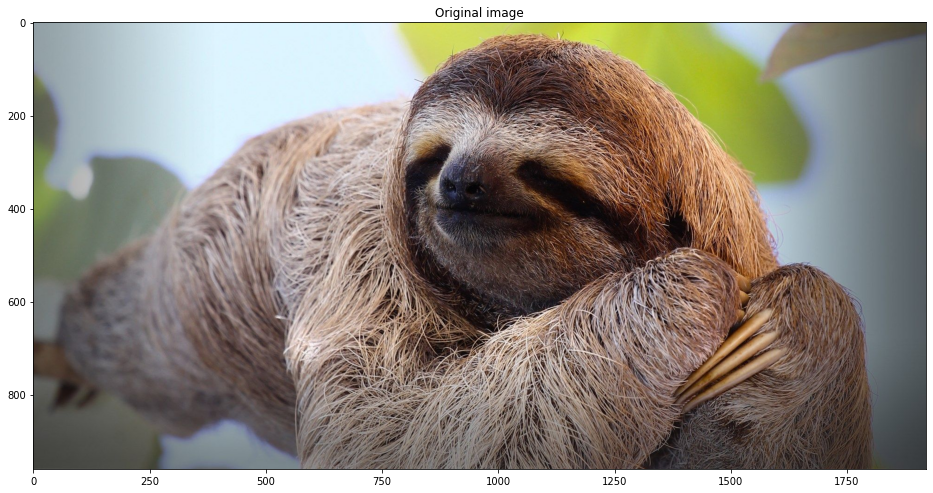

In [3]:
# Load and display image
img = plt.imread('2.PPM')
display_img(img, text='Original image')

In [4]:
# calling svd function on each color channel

r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
rU, rS, rVT = np.linalg.svd(r)
gU, gS, gVT = np.linalg.svd(g)
bU, bS, bVT = np.linalg.svd(b)
rS = np.diag(rS)
gS = np.diag(gS)
bS = np.diag(bS)

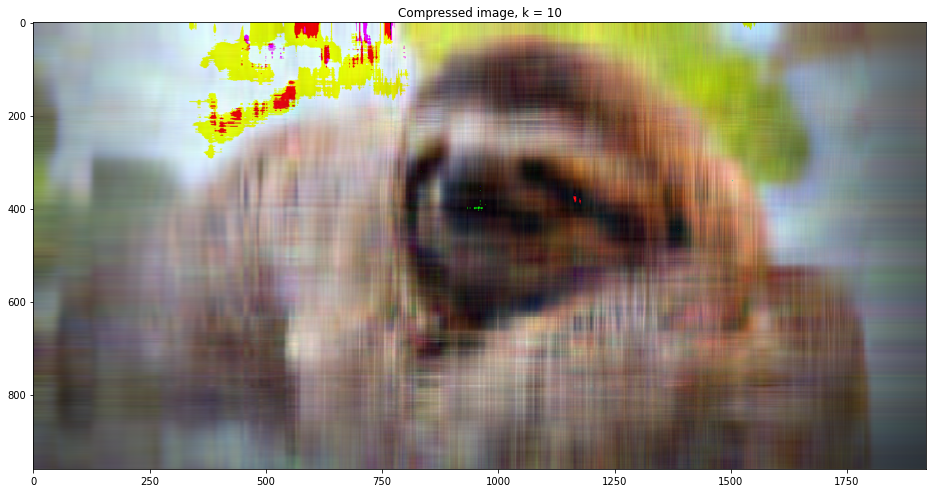

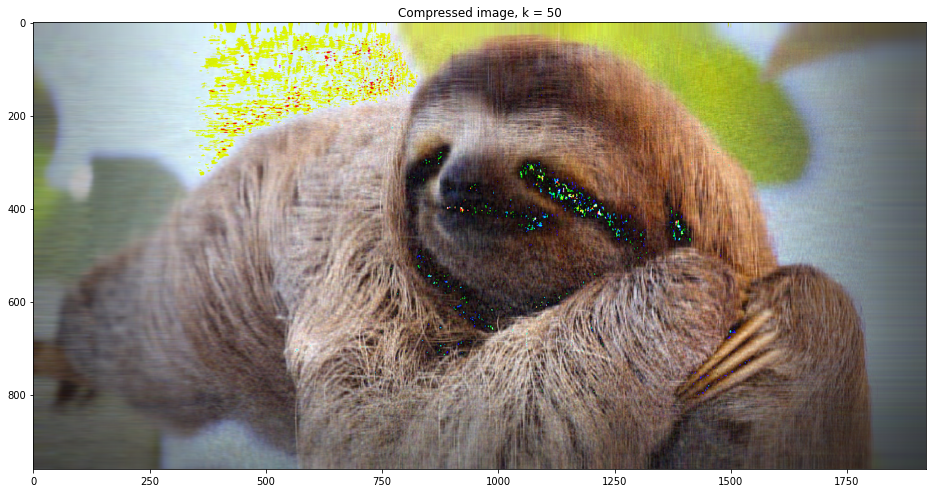

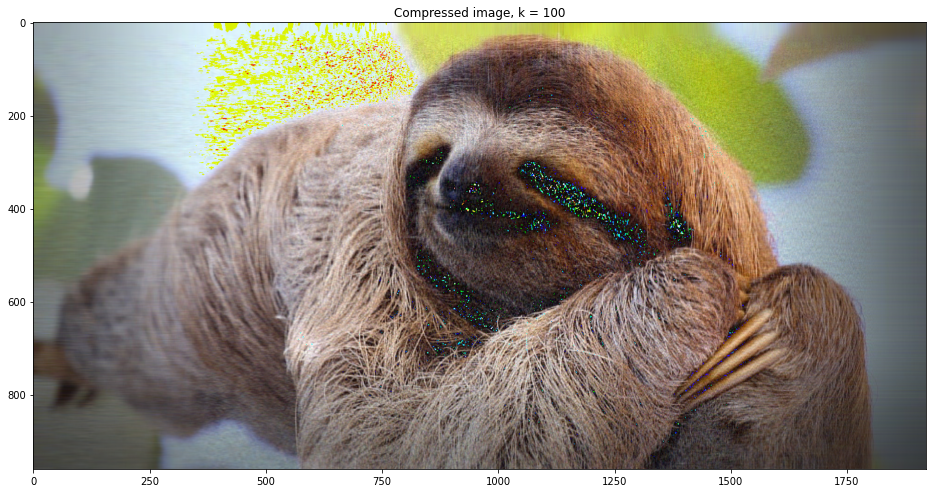

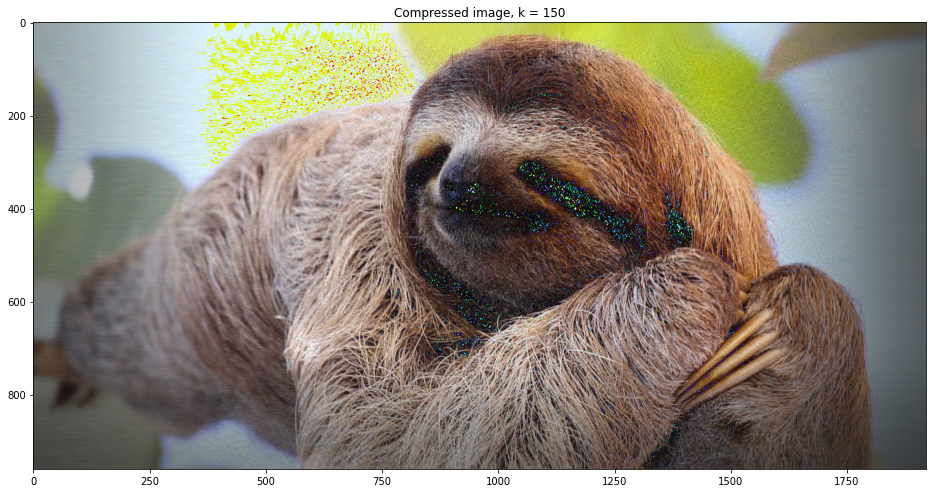

In [5]:
# approximating image with different ks

for k in [10, 50, 100, 150]:
    new_r = rU[:, :k] @ rS[:k, :k] @ rVT[:k, :]
    new_g = gU[:, :k] @ gS[:k, :k] @ gVT[:k, :]
    new_b = bU[:, :k] @ bS[:k, :k] @ bVT[:k, :]
    
    rgb = np.dstack((new_r, new_g, new_b)).astype(np.uint8)
    
    display_img(rgb, text='Compressed image, k = ' + str(k))